In [40]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [3]:
data = fetch_california_housing()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
X = data['data']
y = data['target']
target_names = data['target_names']
feature_names = data['feature_names']

<h3> Data Exploration </h3>

In [20]:
df = pd.DataFrame(X, columns=feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


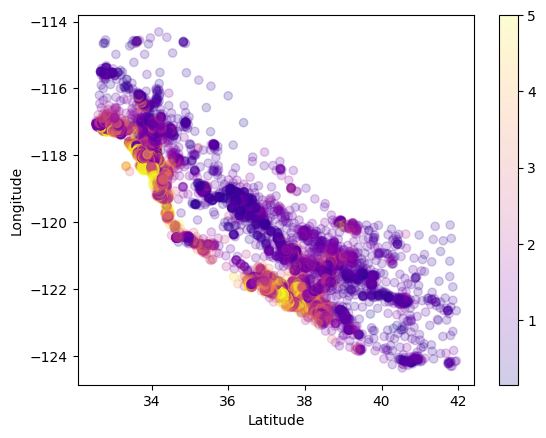

In [36]:
import matplotlib.pyplot as plt

plt.scatter(x=df['Latitude'], y=df['Longitude'], c=y, cmap='plasma', alpha=0.2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar()
plt.show()

<h3> Data Preprocessing </h3>

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pre_prec = Pipeline([
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('std_scaler', StandardScaler())
])

X_processed = pre_prec.fit_transform(X)

<h3> Model Training </h3>

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [47]:
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [48]:
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error

mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print("MSE for DecisionTree Regressor : ", mse_dtr)
print("MSE for RandomForest Regressor : ", mse_rfr)

MSE for DecisionTree Regressor :  0.5174734164868702
MSE for RandomForest Regressor :  0.25854410956328255


<h3> Hyperparameter Tuning </h3>

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=69, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


d:\ml-assignments\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ml-assignments\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\ml-assignments\.venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\ml-assignments\.venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\ml-assignments\.venv\Lib\site-packages\sklear

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=69, verbose=2)

In [56]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1600)

In [58]:
rf_tunned = RandomForestRegressor(
    bootstrap=False, 
    max_depth=30, 
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=1600
)

rf_tunned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1600)

In [59]:
y_pred = rf_tunned.predict(X_test)
print("MSE for tunned model : ", mean_squared_error(y_test, y_pred))

MSE for tunned model :  0.24302058706987345


<h3> Visualization </h3>

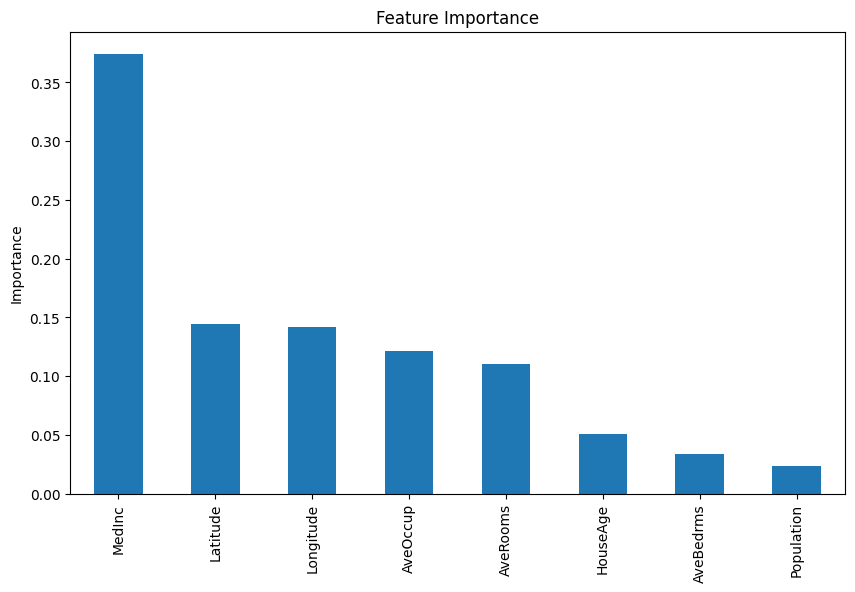

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming that X_test is a pandas DataFrame and its column names are the feature names
feature_importance = rf_tunned.feature_importances_
feature_importance_series = pd.Series(feature_importance, index=feature_names)

# Sort in descending order
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()